# ICTS protiviti - Recozimento

O recozimento é um tratamento térmico que tem por finalidade eliminar a dureza de uma peça temperada ou normalizar materiais com tensões internas resultantes do forjamento, da laminação e da trefilação. De acordo com o novo nível de dureza do material tratado, o resultado do processo de recozimento pode ser classificado como: ideal, mediano ou ruim.

O conjunto de dados apresentado traz o resultado da execução de diferentes processos de recozimento em experimentos variados. Assim sendo, o candidato deve utilizar os dados para treinar um modelo de machine learning que posteriormente deverá ser utilizado para predizer o resultado de novos processos de recozimento.


# Dicionário de dados:

Number of Attributes: 39
Attribute Information:
1. family: --,GB,GK,GS,TN,ZA,ZF,ZH,ZM,ZS
2. product-type: C, H, G
3. steel: -,R,A,U,K,M,S,W,V
4. carbon: continuous
5. hardness: continuous
6. temper_rolling: -,T
7. condition: -,S,A,X
8. formability: -,1,2,3,4,5
9. strength: continuous
10. non-ageing: -,N
11. surface-finish: P,M,-
12. surface-quality: -,D,E,F,G
13. enamelability: -,1,2,3,4,5
14. bc: Y,-
15. bf: Y,-
16. bt: Y,-
17. bw/me: B,M,-
18. bl: Y,-
19. m: Y,-
20. chrom: C,-
21. phos: P,-
22. cbond: Y,-
23. marvi: Y,-
24. exptl: Y,-
25. ferro: Y,-
26. corr: Y,-
27. blue/bright/varn/clean: B,R,V,C,-
28. lustre: Y,-
29. jurofm: Y,-
30. s: Y,-
31. p: Y,-
32. shape: COIL, SHEET
33. thick: continuous
34. width: continuous
35. len: continuous
36. oil: -,Y,N
37. bore: 0000,0500,0600,0760
38. packing: -,1,2,3
39. recozimento: ruim, mediano, ideal
40. experimento: 1 ... n - discrete


* Instalação das libs que serão usados no pipeline

In [1]:
# !pip install imblearn
# !pip install seaborn
# !pip install --upgrade pip
# !pip install scikit-plot

* Importação de bibliotecas

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scikitplot.metrics import plot_roc
from sklearn.model_selection import ParameterGrid
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

from imblearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix

import os
print('LOCAL DE DATASETS')
print()
for dirname, _, filenames in os.walk('/Projetos/app-vivavida/san/20210827'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

LOCAL DE DATASETS

/Projetos/app-vivavida/san/20210827\CADASTRO DE FAMÍLIAS.csv
/Projetos/app-vivavida/san/20210827\run_2nd.bat
/Projetos/app-vivavida/san/20210827\Untitled.ipynb
/Projetos/app-vivavida/san/20210827\.ipynb_checkpoints\CADASTRO DE FAMÍLIAS-checkpoint.csv
/Projetos/app-vivavida/san/20210827\.ipynb_checkpoints\CADASTRO DE FAMÍLIAS2-checkpoint.csv
/Projetos/app-vivavida/san/20210827\.ipynb_checkpoints\Untitled-checkpoint.ipynb


***
# 1) Leitura da base de dados de treinamento e test

* ### Leitura do dataset de DATA

In [3]:
df_date = pd.read_csv("dataset/data_experimentos.csv", sep=',')
df_date

,exp_id,ano,mes
0,2,2020,8
1,1368,2020,8
2,1130,2020,8
3,402,2020,8
4,407,2020,8
...,...,...,...
2419,1354,2020,7
2420,1610,2020,7
2421,2243,2020,7
2422,900,2020,7


* ### Leitura do dataset de Treinamento

In [4]:
df_train = pd.read_csv("dataset/train.csv", sep=',')
df_train

,family,product-type,steel,carbon,hardness,temper_rolling,condition,formability,strength,non-ageing,...,p,shape,thick,width,len,oil,bore,packing,recozimento,experimento
0,?,C,A,8,0,?,S,?,0,?,...,?,COIL,_0.7_,_610.0_,_0_,?,0,?,ruim,exp_2
1,?,C,R,0,0,?,S,2.0,0,?,...,?,SHEET,_0.7_,_1300.0_,_762_,?,0,?,ruim,exp_1368
2,?,C,A,0,60,T,?,?,0,?,...,?,COIL,_2.801_,_385.1_,_0_,?,0,?,ideal,exp_1130
3,?,C,A,0,60,T,?,?,0,?,...,?,SHEET,_0.801_,_255.0_,_269_,?,0,?,ideal,exp_402
4,?,C,A,0,45,?,S,?,0,?,...,?,COIL,_1.6_,_610.0_,_0_,?,0,?,mediano,exp_407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2419,?,C,R,0,0,?,S,2.0,0,?,...,?,SHEET,_1.6_,_1500.0_,_4170_,?,0,?,mediano,exp_1354
2420,TN,C,A,0,0,?,?,3.0,0,N,...,?,SHEET,_1.2_,_609.9_,_1_,?,0,?,mediano,exp_1610
2421,?,C,R,0,0,?,S,3.0,0,?,...,?,SHEET,_1.601_,_830.0_,_880_,?,0,?,mediano,exp_2243
2422,?,C,A,0,85,T,?,?,0,?,...,?,COIL,_0.4_,_20.0_,_0_,?,0,?,mediano,exp_900


* ### Leitura de dataset de Teste

In [5]:
df_test = pd.read_csv("dataset/test.csv", sep=',')
df_test

,family,product-type,steel,carbon,hardness,temper_rolling,condition,formability,strength,non-ageing,...,s,p,shape,thick,width,len,oil,bore,packing,id
0,?,C,K,55,0,?,?,?,0,?,...,?,?,COIL,2.200,900.0,0,?,0,?,1
1,?,C,K,45,0,?,?,?,0,?,...,?,?,COIL,1.090,610.0,0,?,0,?,2
2,?,C,R,0,0,?,S,3.0,0,?,...,?,?,SHEET,1.599,150.0,762,?,0,?,3
3,?,C,A,0,0,?,S,2.0,0,?,...,?,?,COIL,0.400,20.0,0,?,0,?,4
4,?,C,R,0,0,?,S,2.0,0,?,...,?,?,COIL,0.699,1320.0,0,?,0,?,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,?,C,A,0,85,T,?,?,0,?,...,?,?,SHEET,0.300,1220.0,4880,?,0,?,86
86,?,C,A,0,0,?,S,2.0,0,?,...,?,?,SHEET,0.600,610.0,761,?,0,?,87
87,?,C,W,0,0,?,?,?,310,?,...,?,?,COIL,2.500,1274.9,0,?,600,?,88
88,?,C,A,0,60,T,?,?,0,?,...,?,?,COIL,2.801,50.0,0,?,0,?,89


***
# 1.1) Unir o conjunto de dados de treinamento ao de data

* Mesclagem necessária para que fosse possível contabilizar os experimentos realizados em agosto de 2020, conforme requerido.

In [6]:
df_dated_train = pd.concat([df_date, df_train], axis=1)
df_dated_train

,exp_id,ano,mes,family,product-type,steel,carbon,hardness,temper_rolling,condition,...,p,shape,thick,width,len,oil,bore,packing,recozimento,experimento
0,2,2020,8,?,C,A,8,0,?,S,...,?,COIL,_0.7_,_610.0_,_0_,?,0,?,ruim,exp_2
1,1368,2020,8,?,C,R,0,0,?,S,...,?,SHEET,_0.7_,_1300.0_,_762_,?,0,?,ruim,exp_1368
2,1130,2020,8,?,C,A,0,60,T,?,...,?,COIL,_2.801_,_385.1_,_0_,?,0,?,ideal,exp_1130
3,402,2020,8,?,C,A,0,60,T,?,...,?,SHEET,_0.801_,_255.0_,_269_,?,0,?,ideal,exp_402
4,407,2020,8,?,C,A,0,45,?,S,...,?,COIL,_1.6_,_610.0_,_0_,?,0,?,mediano,exp_407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2419,1354,2020,7,?,C,R,0,0,?,S,...,?,SHEET,_1.6_,_1500.0_,_4170_,?,0,?,mediano,exp_1354
2420,1610,2020,7,TN,C,A,0,0,?,?,...,?,SHEET,_1.2_,_609.9_,_1_,?,0,?,mediano,exp_1610
2421,2243,2020,7,?,C,R,0,0,?,S,...,?,SHEET,_1.601_,_830.0_,_880_,?,0,?,mediano,exp_2243
2422,900,2020,7,?,C,A,0,85,T,?,...,?,COIL,_0.4_,_20.0_,_0_,?,0,?,mediano,exp_900


# 1.2) Somente experimentos realizados em agosto de 2020 devem ser considerados.

In [7]:
mes = (df_dated_train['mes'] != 8)
ano = (df_dated_train['ano'] != 2020)

In [8]:
df_dated_train = df_dated_train.loc[~mes]
df_dated_train = df_dated_train.loc[~ano]
df_dated_train

,exp_id,ano,mes,family,product-type,steel,carbon,hardness,temper_rolling,condition,...,p,shape,thick,width,len,oil,bore,packing,recozimento,experimento
0,2,2020,8,?,C,A,8,0,?,S,...,?,COIL,_0.7_,_610.0_,_0_,?,0,?,ruim,exp_2
1,1368,2020,8,?,C,R,0,0,?,S,...,?,SHEET,_0.7_,_1300.0_,_762_,?,0,?,ruim,exp_1368
2,1130,2020,8,?,C,A,0,60,T,?,...,?,COIL,_2.801_,_385.1_,_0_,?,0,?,ideal,exp_1130
3,402,2020,8,?,C,A,0,60,T,?,...,?,SHEET,_0.801_,_255.0_,_269_,?,0,?,ideal,exp_402
4,407,2020,8,?,C,A,0,45,?,S,...,?,COIL,_1.6_,_610.0_,_0_,?,0,?,mediano,exp_407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,374,2020,8,?,C,R,0,0,?,S,...,?,SHEET,_1.6_,_1500.0_,_4170_,?,0,?,mediano,exp_374
804,1166,2020,8,TN,C,A,0,0,?,?,...,?,SHEET,_1.2_,_609.9_,_1_,?,0,?,ideal,exp_1166
805,1363,2020,8,?,C,R,0,0,?,S,...,?,SHEET,_1.601_,_830.0_,_880_,?,0,?,mediano,exp_1363
806,1209,2020,8,?,C,A,0,85,T,?,...,?,COIL,_0.4_,_20.0_,_0_,?,0,?,ideal,exp_1209


***
# 2) Função para checagem de dados faltantes ou inválidos - com NaN - Not a number e missing values

É muito comum as bases de dados virem com dados faltantes e/ou inválidos, sendo assim é muito importante a checagem destes.

* ### A função 'just_check_nan' é para checar dados NaN

In [9]:
def just_check_nan(df):
    missing_val_count_by_column = (df.isna().sum())           # Para trabalhar com valores nulos usar o isna, muito util para determinar quantidade de NaN
    columns_with_nan = missing_val_count_by_column[missing_val_count_by_column > 0]
    print('Dados com NaN:')
    print(columns_with_nan)
    print('')
    print('columns_with_nan.shape', columns_with_nan.shape)
    print('')

* ### Função 'just_check_null' para checar valores NULL

In [10]:
def just_check_null(df):
    missing_val_count_by_column = (df.isnull().sum())           # Para trabalhar com valores nulos usar o isna, muito util para determinar quantidade de NaN
    columns_with_nan = missing_val_count_by_column[missing_val_count_by_column > 0]
    print('Dados com NaN:')
    print(columns_with_nan)
    print('')
    print('columns_with_nan.shape', columns_with_nan.shape)
    print('')

* ### Chamada da função **'just_check_nan'**

In [11]:
just_check_nan(df_dated_train)

Dados com NaN:
Series([], dtype: int64)

columns_with_nan.shape (0,)



* ### Chamada da função **'just_check_null'**

In [12]:
just_check_null(df_dated_train)

Dados com NaN:
Series([], dtype: int64)

columns_with_nan.shape (0,)



Não foram encontrados deliberadamente dados inválidos e NaN

***
# 3) Definição de target e features

* ### Target y

O target é o objetivo do modelo, ou seja, é o que se deseja prever sobre a base de dados "test.csv".

No caso deste trabalho, o objetivo é classificar o processo de recozimento como: ideal, mediano ou ruim

O gráfico mostra a relação entre o processo de recozimento da base de treinamento. Este gráfico também serve para medir o balanceamentro entre as classes.

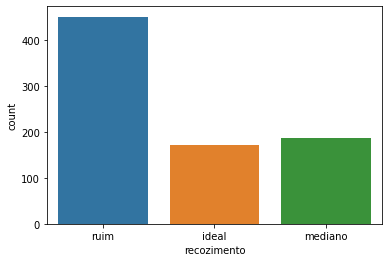

Com relação com a quantidade de 808 recozimentos classificados, 
 - 172 destes foram classificados como IDEAL, ou seja, 21.29%; 
 - 186 destes como MEDIANO, ou seja, 23.02%; 
 - 450 destes como RUIM, ou seja, 55.69%.


<Figure size 432x288 with 0 Axes>

In [13]:
y = df_dated_train.recozimento

sns.countplot(x=y, data=df_dated_train)
plt.show()
plt.savefig('count_plot')

print('Com relação com a quantidade de ' + str(len(df_dated_train)) +  ' recozimentos classificados, \n' \
      + ' - ' + str(Counter(y)['ideal']) + ' destes foram classificados como IDEAL, ou seja, %.2f' %float((Counter(y)['ideal']/len(df_dated_train))*100) + '%; \n' \
      + ' - ' + str(Counter(y)['mediano']) + ' destes como MEDIANO, ou seja, %.2f' %float((Counter(y)['mediano']/len(df_dated_train))*100) + '%; \n' \
      + ' - ' + str(Counter(y)['ruim']) + ' destes como RUIM, ou seja, %.2f' %float((Counter(y)['ruim']/len(df_dated_train))*100) + '%.' )

* ### Features X

As features são os dados que o modelo usará para fazer as previsões. 

Foram excluidas as features de **'recozimento', 'exp_id', 'ano', 'mes', 'experimento'**

Neste caso será considerado todas as colunas, exceto a de target 'recozimento'. 

Posteriormente o PCA, no pipeline, se encarregará de selecionar as features mais relevantes para o modelo, onde há menor correlação entre elas.

In [14]:
X = df_dated_train.drop(columns=['recozimento', 'exp_id', 'ano', 'mes', 'experimento'])
X

,family,product-type,steel,carbon,hardness,temper_rolling,condition,formability,strength,non-ageing,...,jurofm,s,p,shape,thick,width,len,oil,bore,packing
0,?,C,A,8,0,?,S,?,0,?,...,?,?,?,COIL,_0.7_,_610.0_,_0_,?,0,?
1,?,C,R,0,0,?,S,2.0,0,?,...,?,?,?,SHEET,_0.7_,_1300.0_,_762_,?,0,?
2,?,C,A,0,60,T,?,?,0,?,...,?,?,?,COIL,_2.801_,_385.1_,_0_,?,0,?
3,?,C,A,0,60,T,?,?,0,?,...,?,?,?,SHEET,_0.801_,_255.0_,_269_,?,0,?
4,?,C,A,0,45,?,S,?,0,?,...,?,?,?,COIL,_1.6_,_610.0_,_0_,?,0,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,?,C,R,0,0,?,S,2.0,0,?,...,?,?,?,SHEET,_1.6_,_1500.0_,_4170_,?,0,?
804,TN,C,A,0,0,?,?,3.0,0,N,...,?,?,?,SHEET,_1.2_,_609.9_,_1_,?,0,?
805,?,C,R,0,0,?,S,3.0,0,?,...,?,?,?,SHEET,_1.601_,_830.0_,_880_,?,0,?
806,?,C,A,0,85,T,?,?,0,?,...,?,?,?,COIL,_0.4_,_20.0_,_0_,?,0,?


* ### Variaveis Numéricas

Neste caso, está sendo feita uma análise de quantas **variavéis numéricas** existem nas features escolhidas

In [63]:
numerical_cols = [cname for cname in X.columns if X[cname].dtype in ['int64', 'float64']]
print("Numerical variables: ", len(numerical_cols))
print(numerical_cols)

Numerical variables:  4
['carbon', 'hardness', 'strength', 'bore']


* ### Variaveis Categóricas

Neste caso, está sendo feita uma análise de quantas **variavéis categóricas** existem nas features escolhidas, exije uma atenção especial pelo fato do pipeline irá transformar estas variaveis em variaveis binárias, usando **'one hot enconding'**.

In [16]:
s = (X.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables: ", len(object_cols))
print(object_cols)

Categorical variables:  34
['family', 'product-type', 'steel', 'temper_rolling', 'condition', 'formability', 'non-ageing', 'surface-finish', 'surface-quality', 'enamelability', 'bc', 'bf', 'bt', 'bw/me', 'bl', 'm', 'chrom', 'phos', 'cbond', 'marvi', 'exptl', 'ferro', 'corr', 'blue/bright/varn/clean', 'lustre', 'jurofm', 's', 'p', 'shape', 'thick', 'width', 'len', 'oil', 'packing']


***
# 4) train_test_split

Aqui é feita a separação dos dados de treinamento (X_train, y_train) e de teste (X_test, y_test), onde é feita a separação de 60% para o treinamento e 40% para os testes

In [17]:
# 70% for train data and 30% for test data SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.4,
                                                    random_state=42)

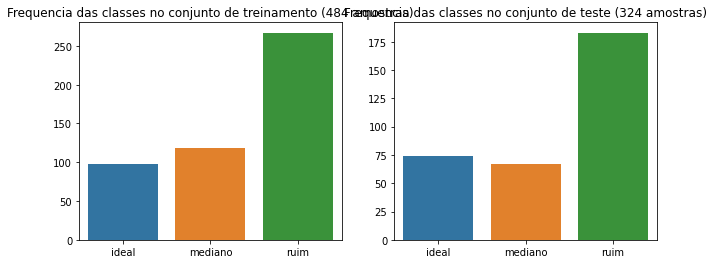

In [18]:
plt.figure(figsize=(16, 4))

plt.subplot(1,3,1)
plt.title('Frequencia das classes no conjunto de treinamento (%i amostras)' % len(X_train))
labels, counts = np.unique(y_train, return_counts=True)
sns.barplot(labels, counts)

plt.subplot(1,3,2)
plt.title('Frequencia das classes no conjunto de teste (%i amostras)' % len(X_test))
labels, counts = np.unique(y_test, return_counts=True)
sns.barplot(labels, counts);

Distribuição das frequencias de classes entre a base de TREINAMENTO e a de TESTE.

***
# 5) Pipeline

O Pipeline é uma série de algoritmos encadeados, compostos e misturados de algumas maneiras para processar um fluxo de dados, recebe entradas e fornece saídas.

numerical_transformer = neste foi feito o uso do 'StandardScaler' para um padronização de escala dos dados numéricos, manter os valores entre 0 e 1. Pelo fato de haver, para as diferentes categorias numéricas, escalas de valores diferentes umas dos outros, há a necessidade de padronizar estes para o modelo de ML.

categorical_transformer = neste caso, usei SimpleImputer com a estratégia de substituir valores faltantes por valores de média da coluna em questão. Neste caso, foi especialmente necessário o uso desse artificio pelo fato do dataset de teste haver dados faltantes, e se não for feito este Imputer o algoritmo não executará.

preprocessor = execução dos anteriores

pipeline:
    - PCA - selecionar as features mais relevantes para o modelo, onde há menor correlação entre elas

In [19]:
# Pré-processamento para Dados numéricos
numerical_transformer = Pipeline([
                                  ('scaler', StandardScaler()) # padronização de escala para ter uma escala comum comum durante a construção do modelo de machine learning
                                 ])                            # em termos tecnicos, transformar os dados de forma que sua distribuição tenha um valor médio 0 e desvio padrão de 1

# Pré-processamento para Dados Categóricos
categorical_transformer = Pipeline([
                                    ('imputer', SimpleImputer(strategy='most_frequent')), # ele substituirá os valores que faltam pela média da coluna (necessário por causa dos dados de teste)
                                    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False)) # transforma dados categorios em binário
                                   ])

# Pré-processamento de pacote de dados numéricos e categóricos
preprocessor = ColumnTransformer(transformers=[
                                               ('num', numerical_transformer, numerical_cols),
                                               ('cat', categorical_transformer, object_cols)
                                              ], n_jobs=-1)

# MODEL
model1 = LogisticRegression()
model2 = DecisionTreeClassifier(random_state=42)
model3 = RandomForestClassifier(n_jobs=-1)
model4 = GradientBoostingClassifier()

* LogisticRegression

In [20]:
## Bundle preprocessing and modeling code in a pipeline
pipeline1 = Pipeline(steps=[
                           ('preprocessor', preprocessor),
                           ('pca', PCA(n_components = 1)),                 # selecionar as features mais relevantes para o modelo, onde há menor correlação entre elas
                           ('model', model1)
                          ])

* DecisionTreeClassifier

In [21]:
## Bundle preprocessing and modeling code in a pipeline
pipeline2 = Pipeline(steps=[
                           ('preprocessor', preprocessor),
                           ('pca', PCA(n_components = 1)),                 # selecionar as features mais relevantes para o modelo, onde há menor correlação entre elas
                           ('model', model2)
                          ])

* RandomForestClassifier

In [22]:
## Bundle preprocessing and modeling code in a pipeline
pipeline3 = Pipeline(steps=[
                           ('preprocessor', preprocessor),
                           ('pca', PCA(n_components = 1)),                 # selecionar as features mais relevantes para o modelo, onde há menor correlação entre elas
                           ('model', model3)
                          ])

* GradientBoostingClassifier

In [23]:
## Bundle preprocessing and modeling code in a pipeline
pipeline4 = Pipeline(steps=[
                           ('preprocessor', preprocessor),
                           ('pca', PCA(n_components = 1)),                 # selecionar as features mais relevantes para o modelo, onde há menor correlação entre elas
                           ('model', model4)
                          ])

# Grid Search

Busca dos melhores parametros para cada modelo

In [24]:
def grid_search(X_train, X_test, y_train, y_test, model, pipeline, grid):
    test_scores = []

    # Loop through the parameter grid, set the hyperparameters, and save the scores
    for g in ParameterGrid(grid):
        model.set_params(**g)  # ** is "unpacking" the dictionary
        pipeline.fit(X_train, y_train)
        test_scores.append(pipeline.score(X_test, y_test))

    # Find best hyperparameters from the test score and print
    best_idx = np.argmax(test_scores)
    print(test_scores[best_idx], ParameterGrid(grid)[best_idx])

* LogisticRegression

In [25]:
#LogisticRegression
grid1 = {'penalty': ['none', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}

grid_search(X_train, X_test, y_train, y_test, model1, pipeline1, grid1)

c:\users\vb\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\vb\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\vb\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\vb\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\vb\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio paramete

0.6388888888888888 {'penalty': 'l2', 'C': 0.09}


In [26]:
model1 = LogisticRegression(penalty='l2', C=0.09)

In [27]:
## Bundle preprocessing and modeling code in a pipeline
pipeline1 = Pipeline(steps=[
                           ('preprocessor', preprocessor),
                           ('pca', PCA(n_components = 1)),                 # selecionar as features mais relevantes para o modelo, onde há menor correlação entre elas
                           ('model', model1)
                          ])

* DecisionTreeClassifier

In [28]:
# DecisionTreeClassifier
grid2 = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}

grid_search(X_train, X_test, y_train, y_test, model2, pipeline2, grid2)

0.7932098765432098 {'max_depth': 4, 'criterion': 'entropy'}


In [29]:
model2 = DecisionTreeClassifier(max_depth=4, criterion='entropy', random_state=42)

In [30]:
## Bundle preprocessing and modeling code in a pipeline
pipeline2 = Pipeline(steps=[
                           ('preprocessor', preprocessor),
                           ('pca', PCA(n_components = 1)),                 # selecionar as features mais relevantes para o modelo, onde há menor correlação entre elas
                           ('model', model2)
                          ])

* RandomForestClassifier

In [31]:
# RandomForestClassifier
grid3 = {'n_estimators': [50, 150, 250], 'max_depth': [14, 20, 24], 'criterion': ['gini', 'entropy']}

grid_search(X_train, X_test, y_train, y_test, model3, pipeline3, grid3)

0.6944444444444444 {'n_estimators': 50, 'max_depth': 14, 'criterion': 'entropy'}


In [32]:
model3 = RandomForestClassifier(n_estimators=50, max_depth=14, criterion='entropy', n_jobs=-1)

In [33]:
## Bundle preprocessing and modeling code in a pipeline
pipeline3 = Pipeline(steps=[
                           ('preprocessor', preprocessor),
                           ('pca', PCA(n_components = 1)),                 # selecionar as features mais relevantes para o modelo, onde há menor correlação entre elas
                           ('model', model3)
                          ])

* GradientBoostingClassifier

In [34]:
# GradientBoostingClassifier
grid4 = {'n_estimators' : [50, 100, 150, 200, 250], 'max_depth': [14, 20, 24], 'random_state' : [42], 'subsample': [0.8], 'max_depth': [20] }

grid_search(X_train, X_test, y_train, y_test, model4, pipeline4, grid4)

0.6882716049382716 {'subsample': 0.8, 'random_state': 42, 'n_estimators': 100, 'max_depth': 20}


In [35]:
model4 = GradientBoostingClassifier(subsample=0.8, n_estimators=100, max_depth=20)

In [36]:
## Bundle preprocessing and modeling code in a pipeline
pipeline4 = Pipeline(steps=[
                           ('preprocessor', preprocessor),
                           ('pca', PCA(n_components = 1)),                 # selecionar as features mais relevantes para o modelo, onde há menor correlação entre elas
                           ('model', model4)
                          ])

***
# 6) Fit

Pré-processamento de dados de treinamento

* ### LogisticRegression

In [37]:
# Preprocessing of training data, fit model 
pipeline1.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['carbon', 'hardness',
                                                   'strength', 'bore']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                           

* ### DecisionTreeClassifier

In [38]:
pipeline2.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['carbon', 'hardness',
                                                   'strength', 'bore']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                           

* ### RandomForestClassifier

In [39]:
pipeline3.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['carbon', 'hardness',
                                                   'strength', 'bore']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                           

* ### GradientBoostingClassifier

In [40]:
pipeline4.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['carbon', 'hardness',
                                                   'strength', 'bore']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                           

***
# 7) Predição

É onde feito as previsões em cima da base de Treinamento. Há um contador mostrando justamente a quantidade de recozimento classificados

* LogisticRegression

In [41]:
preds1 = pipeline1.predict(X_test)
print('Dados Previstos: ', Counter(preds1))

Dados Previstos:  Counter({'ruim': 229, 'mediano': 79, 'ideal': 16})


* DecisionTreeClassifier

In [42]:
preds2 = pipeline2.predict(X_test)
print('Dados Previstos: ', Counter(preds2))

Dados Previstos:  Counter({'ruim': 225, 'ideal': 61, 'mediano': 38})


* RandomForestClassifier

In [43]:
preds3 = pipeline3.predict(X_test)
print('Dados Previstos: ', Counter(preds3))

Dados Previstos:  Counter({'ruim': 186, 'mediano': 71, 'ideal': 67})


* GradientBoostingClassifier

In [44]:
preds4 = pipeline4.predict(X_test)
print('Dados Previstos: ', Counter(preds4))

Dados Previstos:  Counter({'ruim': 178, 'mediano': 80, 'ideal': 66})


***
# 8) Métrica

A curva ROC mostra o quanto o modelo consegue distinguir entre as classes (ideal, mediano e ruim). E o modelo GradientBoostingClassifier teve uma melhor pontuação para cada classe, um indicio que no Classification Report terá melhores resultados

* LogisticRegression

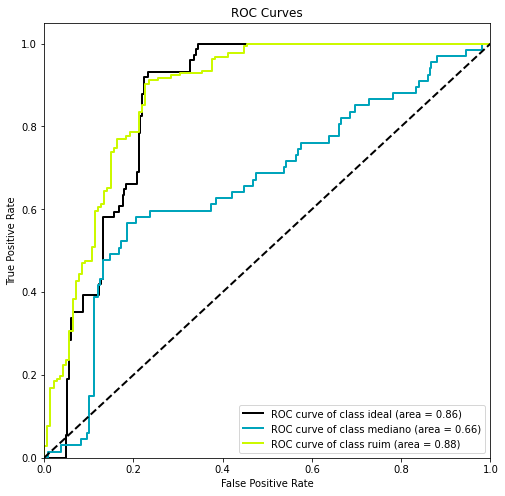

In [45]:
y_probas1 = pipeline1.predict_proba(X_test)
plot_roc(y_test, y_probas1, plot_micro = False, plot_macro = False, figsize = (8, 8))
plt.show()

* DecisionTreeClassifier

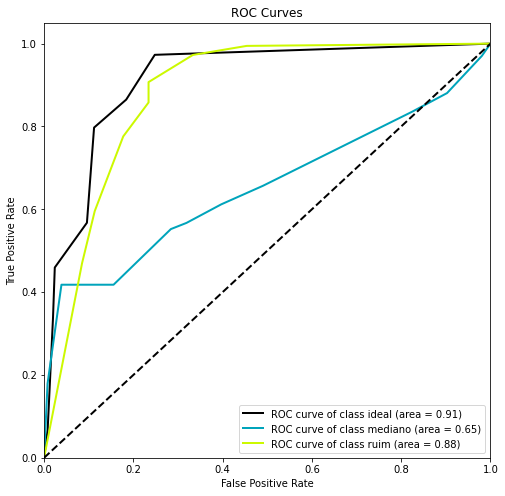

In [46]:
y_probas2 = pipeline2.predict_proba(X_test)
plot_roc(y_test, y_probas2, plot_micro = False, plot_macro = False, figsize = (8, 8))
plt.show()

* RandomForestClassifier

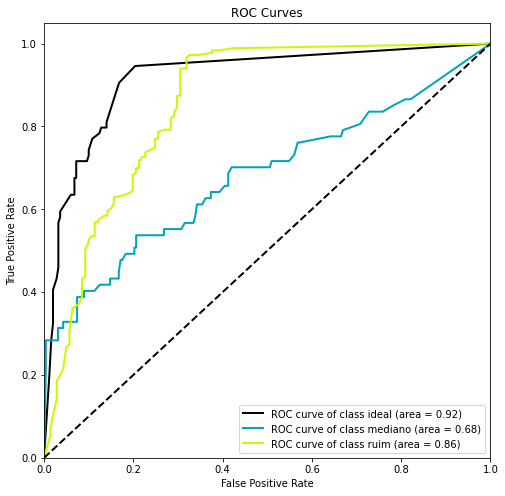

In [47]:
y_probas3 = pipeline3.predict_proba(X_test)
plot_roc(y_test, y_probas3, plot_micro = False, plot_macro = False, figsize = (8, 8))
plt.show()

* GradientBoostingClassifier

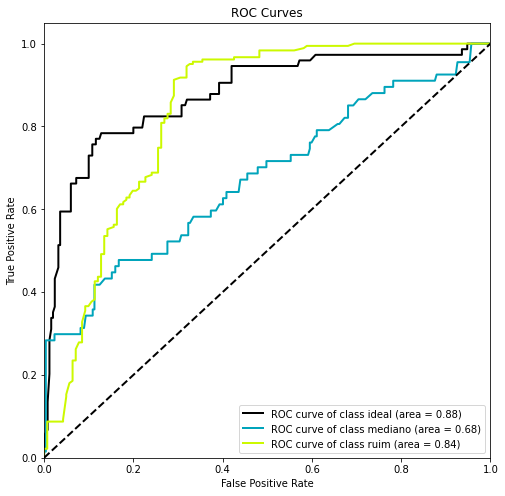

In [48]:
y_probas4 = pipeline4.predict_proba(X_test)
plot_roc(y_test, y_probas4, plot_micro = False, plot_macro = False, figsize = (8, 8))
plt.show()

## Classification Report


Foram feitas comparações de modelos de algoritmos usando Classification Report.

* LogisticRegression

In [49]:
# classification_report
print(classification_report(y_test, preds1))

              precision    recall  f1-score   support

       ideal       0.25      0.05      0.09        74
     mediano       0.34      0.40      0.37        67
        ruim       0.77      0.96      0.85       183

    accuracy                           0.64       324
   macro avg       0.45      0.47      0.44       324
weighted avg       0.56      0.64      0.58       324



* RandomForestClassifier

In [50]:
# classification_report
print(classification_report(y_test, preds3))

              precision    recall  f1-score   support

       ideal       0.75      0.68      0.71        74
     mediano       0.41      0.43      0.42        67
        ruim       0.78      0.80      0.79       183

    accuracy                           0.69       324
   macro avg       0.65      0.64      0.64       324
weighted avg       0.70      0.69      0.70       324



* GradientBoostingClassifier

In [51]:
# classification_report
print(classification_report(y_test, preds4))

              precision    recall  f1-score   support

       ideal       0.74      0.66      0.70        74
     mediano       0.40      0.48      0.44        67
        ruim       0.79      0.77      0.78       183

    accuracy                           0.69       324
   macro avg       0.64      0.64      0.64       324
weighted avg       0.70      0.69      0.69       324



* DecisionTreeClassifier

In [52]:
# classification_report
print(classification_report(y_test, preds2))

              precision    recall  f1-score   support

       ideal       0.84      0.69      0.76        74
     mediano       0.74      0.42      0.53        67
        ruim       0.79      0.97      0.87       183

    accuracy                           0.79       324
   macro avg       0.79      0.69      0.72       324
weighted avg       0.79      0.79      0.78       324



### CONCLUSÃO SOBRE A ESCOLHA DO MODELO: 

Dentre os modelos, o que teve melhor performance foi o **DecisionTreeClassifier**, que basicamente teve um F1 score medio de 72, melhor que os outros modelos. Abaixo foi feito uma analise de Precision e Recall

* ### Precision (casos previstos)

Habilidade de encontrar apenas os pontos relevantes (verdadeiro positivo / positivos) 

exemplo: De todos os casos PREVISTOS classificados como 'IDEAL', qual percentual realmente é IDEAL?

O modelo previu 61 como IDEAL, acertou 51, precisão de 84%

O modelo previu 38 como MEDIANO, acertou 28, precisão de 74%

O modelo previu 225 como RUIM, acertou 177, precisão de 79%

In [53]:
print('GradientBoostingClassifier: ', Counter(preds2))

GradientBoostingClassifier:  Counter({'ruim': 225, 'ideal': 61, 'mediano': 38})


* ### Recall (casos reais)

Habilidade de encontrar todos os casos reais no DATASET (verdadeiro positivo)

exemplo: De todos os casos que são REALMENTE 'IDEAL', qual percentual é identificado corretamente pelo modelo?

Dos 74 casos reais de IDEAL, ele acertou 51, que é 69%

Dos 67 casos reais de MEDIANO, ele acertou 28, que é 42%

Dos 183 casos reais de RUIM, ele acertou 142, que é 78%

In [54]:
print('y_test: ', Counter(y_test))

y_test:  Counter({'ruim': 183, 'ideal': 74, 'mediano': 67})


* ### F1 score

É uma média harmônica ponderada de precision e recall, de modo que a melhor pontuação seja 1,0 e a pior seja 0,0.

F1 score medio de 0.72, melhor que os outros modelos

* ### support (y_test)

O Support diz que você a quantidade de classes da base de teste (y_test), no caso temos:
 - 74 para IDEAL
 - 67 para MEDIANO
 - 183 para RUIM

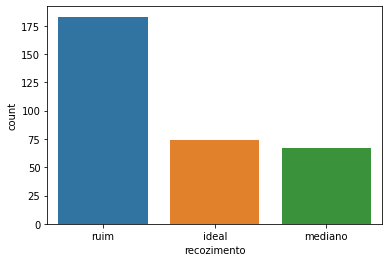

Com relação com a quantidade de 324 recozimentos da base de TESTE, 
 - 74 destes foram classificados como IDEAL, ou seja, 22.84%; 
 - 67 destes como MEDIANO, ou seja, 20.68%; 
 - 183 destes como RUIM, ou seja, 56.48%.


<Figure size 432x288 with 0 Axes>

In [55]:
sns.countplot(x=y_test, data=X_test)
plt.show()
plt.savefig('count_plot')

print('Com relação com a quantidade de ' + str(len(X_test)) +  ' recozimentos da base de TESTE, \n' \
      + ' - ' + str(Counter(y_test)['ideal']) + ' destes foram classificados como IDEAL, ou seja, %.2f' %float((Counter(y_test)['ideal']/len(X_test))*100) + '%; \n' \
      + ' - ' + str(Counter(y_test)['mediano']) + ' destes como MEDIANO, ou seja, %.2f' %float((Counter(y_test)['mediano']/len(X_test))*100) + '%; \n' \
      + ' - ' + str(Counter(y_test)['ruim']) + ' destes como RUIM, ou seja, %.2f' %float((Counter(y_test)['ruim']/len(X_test))*100) + '%.' )

# 9) Make Predictions

Usando o GradientBoostingClassifier como modelo, aqui é gerado predições para a base de teste.

In [56]:
X_eval = df_test.drop(columns=['id'])
X_eval

,family,product-type,steel,carbon,hardness,temper_rolling,condition,formability,strength,non-ageing,...,jurofm,s,p,shape,thick,width,len,oil,bore,packing
0,?,C,K,55,0,?,?,?,0,?,...,?,?,?,COIL,2.200,900.0,0,?,0,?
1,?,C,K,45,0,?,?,?,0,?,...,?,?,?,COIL,1.090,610.0,0,?,0,?
2,?,C,R,0,0,?,S,3.0,0,?,...,?,?,?,SHEET,1.599,150.0,762,?,0,?
3,?,C,A,0,0,?,S,2.0,0,?,...,?,?,?,COIL,0.400,20.0,0,?,0,?
4,?,C,R,0,0,?,S,2.0,0,?,...,?,?,?,COIL,0.699,1320.0,0,?,0,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,?,C,A,0,85,T,?,?,0,?,...,?,?,?,SHEET,0.300,1220.0,4880,?,0,?
86,?,C,A,0,0,?,S,2.0,0,?,...,?,?,?,SHEET,0.600,610.0,761,?,0,?
87,?,C,W,0,0,?,?,?,310,?,...,?,?,?,COIL,2.500,1274.9,0,?,600,?
88,?,C,A,0,60,T,?,?,0,?,...,?,?,?,COIL,2.801,50.0,0,?,0,?


In [57]:
just_check_nan(X_eval)

Dados com NaN:
Series([], dtype: int64)

columns_with_nan.shape (0,)



In [58]:
just_check_null(X_eval)

Dados com NaN:
Series([], dtype: int64)

columns_with_nan.shape (0,)



In [59]:
test_preds = pipeline2.predict(X_eval)
print('preds: ', Counter(test_preds))

preds:  Counter({'ruim': 71, 'mediano': 14, 'ideal': 5})


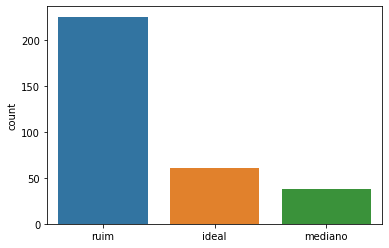

Com relação com a quantidade de 90 recozimentos PREVISTOS, 
 - 61 destes foram classificados como IDEAL, ou seja, 67.78%; 
 - 38 destes como MEDIANO, ou seja, 42.22%; 
 - 225 destes como RUIM, ou seja, 250.00%.


<Figure size 432x288 with 0 Axes>

In [60]:
sns.countplot(x=preds2, data=X_eval)
plt.show()
plt.savefig('count_plot')

print('Com relação com a quantidade de ' + str(len(X_eval)) +  ' recozimentos PREVISTOS, \n' \
      + ' - ' + str(Counter(preds2)['ideal']) + ' destes foram classificados como IDEAL, ou seja, %.2f' %float((Counter(preds2)['ideal']/len(X_eval))*100) + '%; \n' \
      + ' - ' + str(Counter(preds2)['mediano']) + ' destes como MEDIANO, ou seja, %.2f' %float((Counter(preds2)['mediano']/len(X_eval))*100) + '%; \n' \
      + ' - ' + str(Counter(preds2)['ruim']) + ' destes como RUIM, ou seja, %.2f' %float((Counter(preds2)['ruim']/len(X_eval))*100) + '%.' )

<AxesSubplot:title={'center':'Frequencia das classes no conjunto de validação (90 amostras)'}>

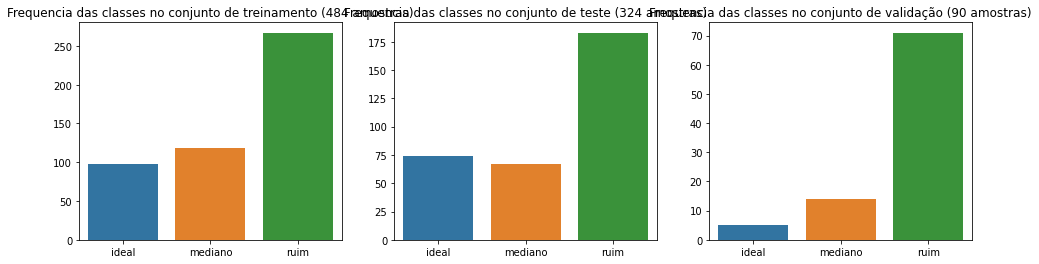

In [61]:
plt.figure(figsize=(16, 4))

plt.subplot(1,3,1)
plt.title('Frequencia das classes no conjunto de treinamento (%i amostras)' % len(X_train))
labels, counts = np.unique(y_train, return_counts=True)
sns.barplot(labels, counts)

plt.subplot(1,3,2)
plt.title('Frequencia das classes no conjunto de teste (%i amostras)' % len(X_test))
labels, counts = np.unique(y_test, return_counts=True)
sns.barplot(labels, counts);

plt.subplot(1,3,3)
plt.title('Frequencia das classes no conjunto de validação (%i amostras)' % len(X_eval))
labels, counts = np.unique(test_preds, return_counts=True)
sns.barplot(labels, counts)

Distribuição das frequencias de classes entre a base de TREINAMENTO, TESTE e PREVISTOS.

# 10) Output file

Geração do arquivo de entrega

In [62]:
output_test = pd.DataFrame({'recozimento' : test_preds})

output_test.to_csv('submission_test.csv', index=False)